Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/Bangla drama sentiment analysis/'
stopwords_list = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
from nltk.corpus import stopwords
import re
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/datasets/thesis/bangla_sentence_Dataset(modified for mixing).xlsx')
data.text=data.text.astype(str)
data = data.dropna()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
len(data.classes.value_counts())

6

In [ ]:
data.classes.unique()

array(['disgust', 'anger', 'joy', 'surprise', 'fear', 'sadness'],
      dtype=object)

In [ ]:
#Checking for NULLs and removing them
data.isnull().sum()

text       0
classes    0
dtype: int64

In [ ]:
#Dropping duplicates
data.shape


(19204, 2)

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.shape

(19203, 2)

In [ ]:
data.dropna(thresh=2)

,text,classes
0,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,disgust
1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,disgust
2,ভেজাল নির্বাচন ।,anger
3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,joy
4,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",anger
...,...,...
19199,৬ মাস এমন করে চেক দিলে চুরি কমে যাবে ইনশাআল্লাহ!!,joy
19200,শুরুটা অল্প বলে কি সাজা মাত্র ১ বছর....,disgust
19201,"ভাই, আপনার ""চলে গেলেন"" দেইক্ষাইতো ইন্নালিল্লাহ...",joy
19202,বুলাপু ️\nএত সাহস নিয়ে কিভাবে এত গুছায় কথা বলল...,surprise


In [ ]:
#Preprocessing the text
print(data['text'].apply(lambda x: len(str(x).split(' '))).sum())

373694


In [ ]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'

In [ ]:
'''
def clean_text(text):

    data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in STOPWORDS))
    return text


data['text'] = data['text'].apply(clean_text)
'''

'\ndef clean_text(text):\n\n    data[\'text\'] = data[\'text\'].apply(lambda x: " ".join(x.lower() for x in str(x).split()                                     if x not in STOPWORDS))\n    return text\n\n    \ndata[\'text\'] = data[\'text\'].apply(clean_text)\n'

In [ ]:
print(data['text'].apply(lambda x: len(x.split(' '))).sum())

373694


In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Joy Reviews:",len(data[data.classes =='joy']),
      "\nTotal Sadness Reviews:",len(data[data.classes=='sadness']),
      "\nTotal Anger Reviews:",len(data[data.classes =='anger']),
      "\nTotal Disgust Reviews:",len(data[data.classes =='disgust']),
      "\nTotal Fear Reviews:",len(data[data.classes =='fear']),
      "\nTotal Surprised Reviews:",len(data[data.classes =='surprise'])
      )

Total Reviews: 19203 
Total Joy Reviews: 4506 
Total Sadness Reviews: 4314 
Total Anger Reviews: 3468 
Total Disgust Reviews: 2764 
Total Fear Reviews: 2053 
Total Surprised Reviews: 2098


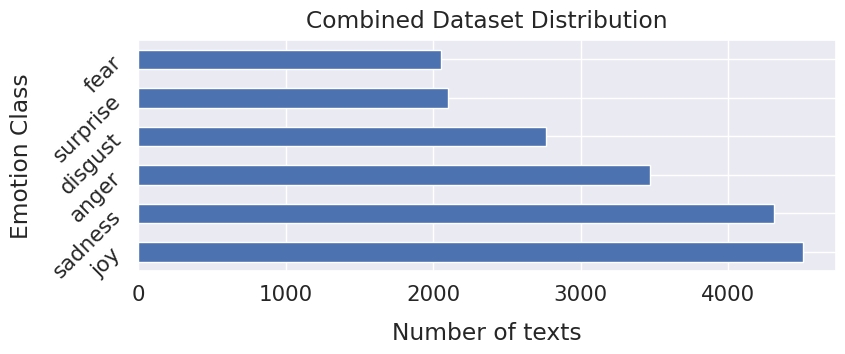

In [ ]:
#dataset visualization
sns.set(font_scale=1.4)
data['classes'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Combined Dataset Distribution", y=1.02);

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
X = data.text
y = data.classes

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13442,), (5761,), (13442,), (5761,))

In [ ]:
#Applying Logistic Regression
#Applying Naive Bayes
#Applying XGBoost

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is : 0.38916854712723487


In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.3695538968929005


In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.3787536885957299


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00


In [ ]:
from transformers import BertForSequenceClassification
from torch.utils.data import TensorDataset
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer

In [ ]:
possible_labels = data.classes.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'disgust': 0, 'anger': 1, 'joy': 2, 'surprise': 3, 'fear': 4, 'sadness': 5}

In [ ]:
#droping a column and replace it with another
data['classes'] = data.classes.replace(label_dict)

In [ ]:
from sklearn.model_selection import train_test_split

train, eval = train_test_split(data,test_size=0.3)
train.head()

,text,classes
14505,এসব পোস্ট সত্য কি মিথ্যা তা জানিনা আমি হলে বাব...,0
13359,আমার নিভে যাওয়া প্রদীপ তুমি পারবে কি জ্বালাতে ...,5
635,জামাত নিয়ে রাজনীতি করবেনা। জামাতকে ধূকে ধূকে ব...,1
9638,গুদামে সম্ভবত মালপানি শর্ট পড়ছে তাই হয়তো ইমরান...,2
19202,বুলাপু ️\nএত সাহস নিয়ে কিভাবে এত গুছায় কথা বলল...,3


In [ ]:
eval.head()

,text,classes
15699,তোমাকে আমি কতটা ভালবাসি সেটা কি তুমি জান জান ...,5
1269,সরকার জানে বিএনপিকে একদিন নামতে দিলে ক্ষমতার খ...,5
14454,এর বাইরে চাবিয়ে চাবিয়ে কথা বলা ছাড়া উনার আর বি...,0
14596,কক্সবাজারের কুতুবদিয়া উপজেলায় দুই স্কুলছাত্রকে...,1
12825,সালের অক্টোবরে পুঁজিবাদ বিরোধী হাজার হাজার মা...,0


In [ ]:
data.head()

,text,classes
0,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,0
1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,0
2,ভেজাল নির্বাচন ।,1
3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2
4,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",1


In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
#Multi-lingual BERT
import pandas as pd

from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score

# Create a ClassificationModel

model = ClassificationModel("bert", "bert-base-multilingual-uncased", num_labels=6, use_cuda=False, args={
    'max_seq_length': 64,
    'train_batch_size': 16,
    'gradient_accumulation_steps': 1,
    'eval_batch_size': 16,
    'num_train_epochs': 2,
    'weight_decay': 0,
    'learning_rate': 2e-5,
    'adam_epsilon': 1e-8,
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'num_train_epochs': 2,
    'silent': True,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,

    "logging_steps": 50,
    "save_steps": 2000,

    "overwrite_output_dir": True,
    "reprocess_input_data": False,
    "evaluate_during_training": False,

})

# Train the model
model.train_model(train)

# Evaluate the model

def f1_multiclass(classes, text):
    return f1_score(classes, text, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval, f1=f1_multiclass, acc=accuracy_score)


Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingu

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


In [ ]:
print(result)

{'mcc': 0.2714024003389559, 'f1': 0.414684950529422, 'acc': 0.414684950529422, 'eval_loss': 1.5008558208262162}
